# Analisis exploratorio de datos

En este notebook auxiliar se hará un analisís exploratorio sobre los datos para revisar posibles datos faltantes, distribucción de clases, columnas a normalizar y modificar

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Carga de datos y lectura inicial
data=pd.read_csv('depression.csv')
data.head()

,Gender,Age,CGPA,Sleep Duration,Degree,Suicidal Thoughts,Work/Study Hours,Family History of Mental Illness,Depression
0,Male,33.0,8.97,5-6 hours,Undergraduate,Yes,3.0,No,1
1,Female,24.0,5.90,5-6 hours,Undergraduate,No,3.0,Yes,0
2,Male,31.0,7.03,Less than 5 hours,Undergraduate,No,9.0,Yes,0
3,Female,28.0,5.59,7-8 hours,Undergraduate,Yes,4.0,Yes,1
4,Female,25.0,8.13,5-6 hours,Postgraduate,Yes,1.0,No,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender                            27901 non-null  object 
 1   Age                               27901 non-null  float64
 2   CGPA                              27901 non-null  float64
 3   Sleep Duration                    27901 non-null  object 
 4   Degree                            27901 non-null  object 
 5   Suicidal Thoughts                 27901 non-null  object 
 6   Work/Study Hours                  27901 non-null  float64
 7   Family History of Mental Illness  27901 non-null  object 
 8   Depression                        27901 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 1.9+ MB


In [4]:
data.shape

(27901, 9)

In [5]:
data.describe()

,Age,CGPA,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000
mean,25.822300,7.656104,7.156984,0.585499
std,4.905687,1.470707,3.707642,0.492645
min,18.000000,0.000000,0.000000,0.000000
25%,21.000000,6.290000,4.000000,0.000000
50%,25.000000,7.770000,8.000000,1.000000
75%,30.000000,8.920000,10.000000,1.000000
max,59.000000,10.000000,12.000000,1.000000


In [6]:
data.value_counts()

Gender  Age   CGPA  Sleep Duration     Degree         Suicidal Thoughts  Work/Study Hours  Family History of Mental Illness  Depression
Male    23.0  8.74  Less than 5 hours  Undergraduate  Yes                10.0              No                                1             4
        19.0  6.21  Less than 5 hours  High School    Yes                12.0              Yes                               1             3
        24.0  7.09  More than 8 hours  Undergraduate  Yes                10.0              Yes                               1             3
        19.0  7.10  Less than 5 hours  High School    Yes                11.0              Yes                               1             3
        18.0  7.25  7-8 hours          High School    Yes                10.0              Yes                               1             3
                                                                                                                                          ..
Female  30.0  6.37

In [7]:
# Revisión de valores faltantes
data.isnull().sum()

Gender                              0
Age                                 0
CGPA                                0
Sleep Duration                      0
Degree                              0
Suicidal Thoughts                   0
Work/Study Hours                    0
Family History of Mental Illness    0
Depression                          0
dtype: int64

In [8]:
# Distribución de clases
data["Depression"].value_counts(normalize=True)

Depression
1    0.585499
0    0.414501
Name: proportion, dtype: float64

Hay mayor proporcion de datos con depresión, una diferencia del 34.1996%. Por lo que lo mas probable es que se opte por una estrategia de balanceo según los resultados optenidos

## Visualizaciones de variables categóricas

Estudiaremos algunas variables categoricas, sus cantidades y que tanto se relacionan con la etiqueta

<Axes: xlabel='Gender', ylabel='count'>

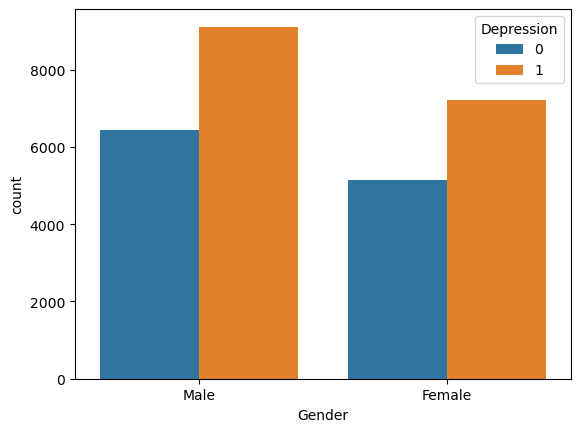

In [9]:
sns.countplot(data=data, x="Gender", hue="Depression")

<Axes: xlabel='Sleep Duration', ylabel='count'>

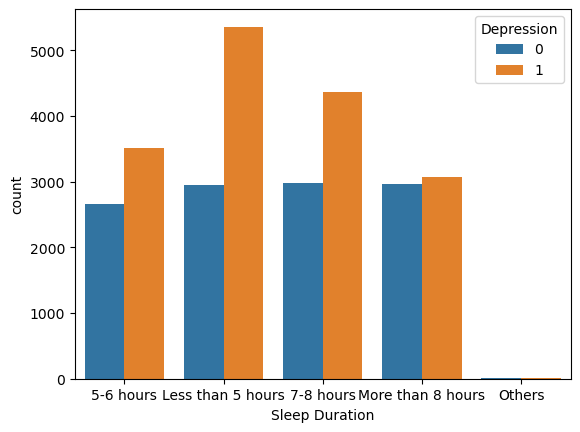

In [10]:
sns.countplot(data=data, x="Sleep Duration", hue="Depression")

<Axes: xlabel='Degree', ylabel='count'>

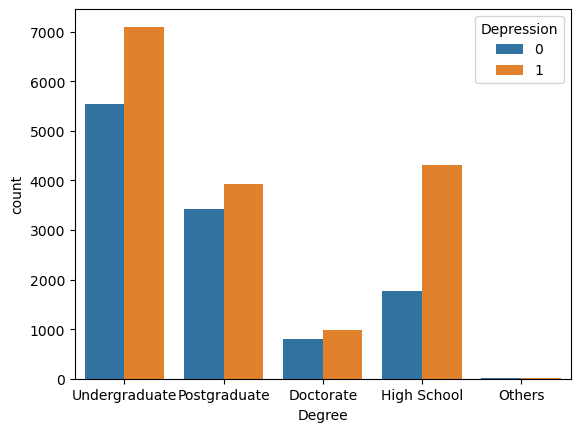

In [11]:
sns.countplot(data=data, x="Degree", hue="Depression")

<Axes: xlabel='Suicidal Thoughts', ylabel='count'>

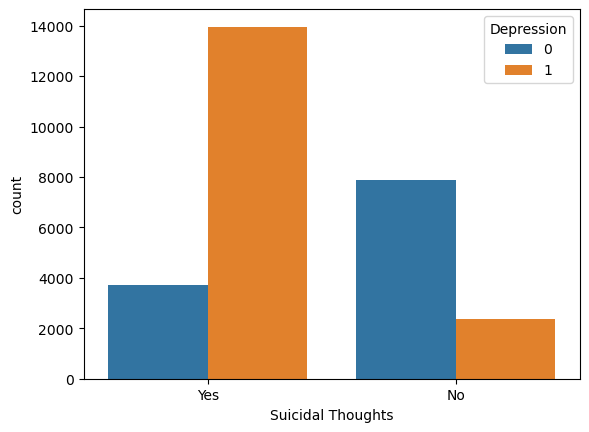

In [12]:
sns.countplot(data=data, x="Suicidal Thoughts", hue="Depression")

<Axes: xlabel='Family History of Mental Illness', ylabel='count'>

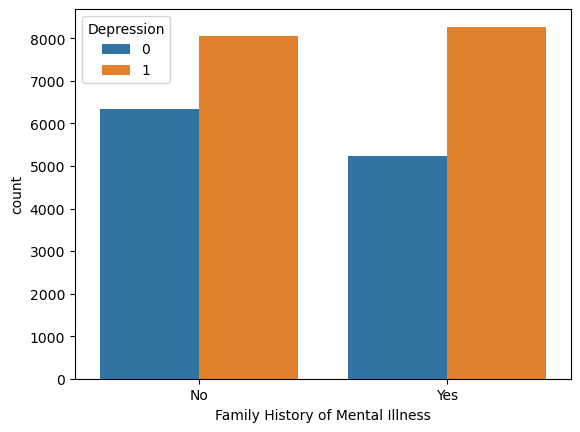

In [13]:
sns.countplot(data=data, x="Family History of Mental Illness", hue="Depression")

## Relación entre variables numéricas y la clase

<Axes: xlabel='Depression', ylabel='CGPA'>

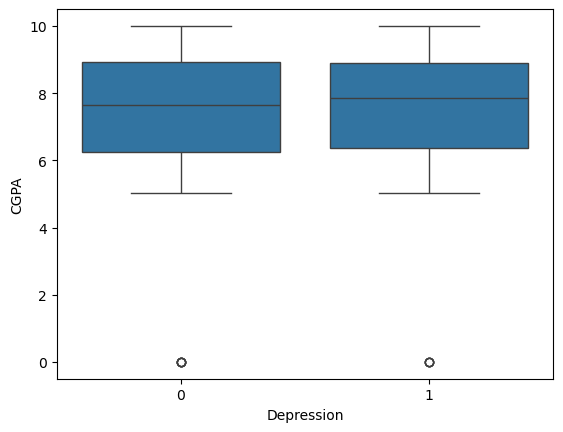

In [14]:
sns.boxplot(data=data, x="Depression", y="CGPA")

<Axes: xlabel='Depression', ylabel='Age'>

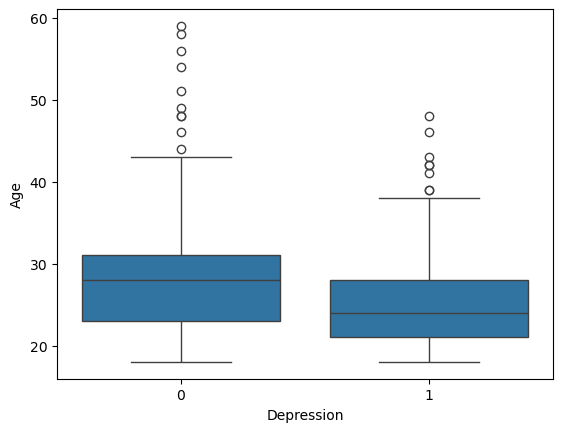

In [15]:
sns.boxplot(data=data, x="Depression", y="Age")

<Axes: xlabel='Depression', ylabel='Work/Study Hours'>

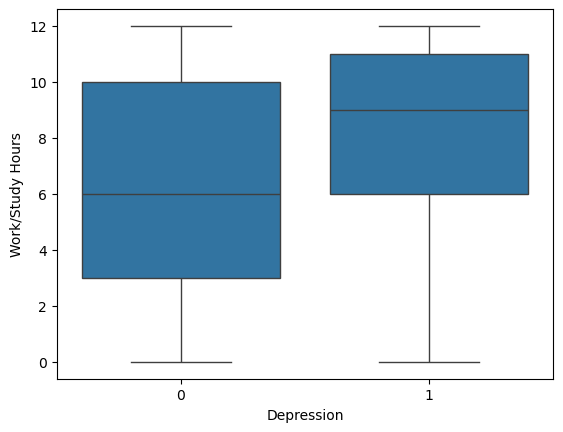

In [16]:
sns.boxplot(data=data, x="Depression", y="Work/Study Hours")

## Conclusiones EDA

Tras realizar el EDA podemos concluir que los datos se encuentran bien tratados. No se detectaron valores nulos ni atípicos que puedan obstaculizar la construcción de modelos como redes neuronales o árboles de decisión.

Se evidenció una distribución **ligeramente desbalanceada** en la variable objetivo, con una **mayor proporción de personas con síntomas depresivos** (aproximadamente 58.5%). Este desbalance será tenido en cuenta durante el modelado, ya sea mediante el uso de estrategias específicas o técnicas de sobremuestreo como **SMOTE**, si los resultados así lo requieren.

También se observaron algunas **relaciones interesantes entre variables categóricas y la presencia de depresión**:

 * La proporción de hombres con síntomas depresivos es más alta (aunque hay más hombres en el conjunto total).
 * La mayoría de personas con depresión duerme **menos de 5 horas**.
 * **Estudiantes de pregrado** presentan una mayor incidencia de depresión en comparación con otros niveles educativos.
 * Como es de esperarse, las personas con **pensamientos suicidas** tienen una alta correlación con la presencia de depresión.
 * El antecedente familiar de enfermedades mentales muestra una diferencia leve entre personas con y sin depresión, por lo que su impacto podría ser menos significativo en el modelo.

Estos hallazgos orientarán las decisiones de preprocesamiento y permitirán evaluar la relevancia de cada variable en las siguientes etapas de modelado.

